## Excecise Binary Classifcation

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import notebook 
import seaborn as sns
import imageio
from IPython.display import HTML
import time


from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs, make_moons, make_circles

In [2]:
rgb_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

In [3]:
np.random.seed(0)

In [158]:
#data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
#data, labels = make_moons(n_samples=1000, random_state=0, noise=0.15)
data, labels = make_circles(n_samples=1000, random_state=0, noise=0.2, factor=0.3)
print(data.shape, labels.shape)

(1000, 2) (1000,)


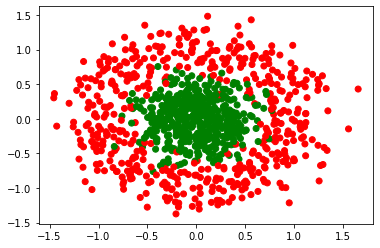

In [159]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=rgb_cmap)
plt.show()

In [160]:
labels_orig = labels
labels = np.mod(labels_orig, 2)

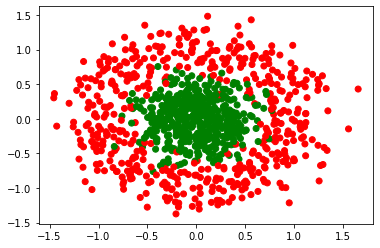

In [161]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=rgb_cmap)
plt.show()

In [162]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


In [163]:
class FFNetwork:
  
  def __init__(self):
    np.random.seed(0)
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w6 = np.random.randn()
    self.w7 = np.random.randn()
    self.w8 = np.random.randn()
    self.w9 = np.random.randn()
    self.w10 = np.random.randn()
    self.w11 = np.random.randn()
    self.w12 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0
    self.b5 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w6*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w7*self.h1 + self.w8*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    self.a4 = self.w9*self.h1 + self.w10*self.h2 + self.b4
    self.h4 = self.sigmoid(self.a4)
    self.a5 = self.w11*self.h3 + self.w12*self.h4 + self.b5
    self.h5 = self.sigmoid(self.a5)


    return self.h3
  
  def grad(self, x, y):
    self.forward_pass(x)
    
    self.dw11 = (self.h5-y)*self.h5*(1-self.h5)*self.h3
    self.dw12 = (self.h5-y)*self.h5*(1-self.h5)*self.h4
    self.db5  = (self.h5 -y)*self.h5*(1-self.h5)
    
    self.dw7  = self.h1*self.h3*(1-self.h3)*self.w11*self.h5*(1-self.h5)*(self.h5-y)
    self.dw8  = self.h2*self.h3*(1-self.h3)*self.w11*self.h5*(1-self.h5)*(self.h5-y)
    self.dw9  = self.h1*self.h4*(1-self.h4)*self.w12*self.h5*(1-self.h5)*(self.h5-y)
    self.dw10 = self.h2*self.h4*(1-self.h4)*self.w12*self.h5*(1-self.h5)*(self.h5-y)
    self.db3  = self.h3*(1-self.h3)*self.w11*self.h5*(1-self.h5)*(self.h5-y)
    self.db4  = self.h4*(1-self.h4)*self.w12*self.h5*(1-self.h5)*(self.h5-y)
    
    self.dw1  = self.x1* self.h1*(1-self.h1)* self.w7*self.h3*(1-self.h3)*self.w11*self.h5*(1-self.h5)*(self.h5-y)
    self.dw1  += self.x1* self.h1*(1-self.h1)* self.w9*self.h4*(1-self.h4)*self.w12*self.h5*(1-self.h5)*(self.h5-y)
    self.dw2  = self.x2* self.h1*(1-self.h1)* self.w7*self.h3*(1-self.h3)*self.w11*self.h5*(1-self.h5)*(self.h5-y)
    self.dw2  += self.x2* self.h1*(1-self.h1)* self.w9*self.h4*(1-self.h4)*self.w12*self.h5*(1-self.h5)*(self.h5-y)
    self.dw3  = self.x1* self.h2*(1-self.h2)* self.w8*self.h3*(1-self.h3)*self.w11*self.h5*(1-self.h5)*(self.h5-y)
    self.dw3  += self.x1* self.h2*(1-self.h2)* self.w10*self.h4*(1-self.h4)*self.w12*self.h5*(1-self.h5)*(self.h5-y)
    self.dw6  = self.x2* self.h2*(1-self.h2)* self.w8*self.h3*(1-self.h3)*self.w11*self.h5*(1-self.h5)*(self.h5-y)
    self.dw6  += self.x1* self.h2*(1-self.h2)* self.w10*self.h4*(1-self.h4)*self.w12*self.h5*(1-self.h5)*(self.h5-y)
    self.db1  = self.h1*(1-self.h1)* self.w7*self.h3*(1-self.h3)*self.w11*self.h5*(1-self.h5)*(self.h5-y)
    self.db1  += self.h1*(1-self.h1)* self.w9*self.h4*(1-self.h4)*self.w12*self.h5*(1-self.h5)*(self.h5-y)
    self.db2  = self.h2*(1-self.h2)* self.w8*self.h3*(1-self.h3)*self.w11*self.h5*(1-self.h5)*(self.h5-y)
    self.db2  += self.h2*(1-self.h2)* self.w10*self.h4*(1-self.h4)*self.w12*self.h5*(1-self.h5)*(self.h5-y)


    
       
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False, display_weight=False):
    
    # initialise w, b
    if initialise:
      np.random.seed(0)
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w6 = np.random.randn()
      self.w7 = np.random.randn()
      self.w8 = np.random.randn()
      self.w9 = np.random.randn()
      self.w10 = np.random.randn()
      self.w11 = np.random.randn()
      self.w12 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      self.b4 = 0
      self.b5 = 0
      
    if display_loss:
      loss = {}
    
    for i in notebook.tqdm(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw6,dw7,dw8,dw9,dw10,dw11,dw12, db1, db2, db3,db4,db5 = [0]*15
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw6 += self.dw6
        dw7 += self.dw7
        dw8 += self.dw8
        dw9 += self.dw9
        dw10 += self.dw10
        dw11 += self.dw11
        dw12 += self.dw12
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        db4 += self.db4
        db5 += self.db5
        
      m = X.shape[0]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w6 -= learning_rate * dw6 / m
      self.w7 -= learning_rate * dw7 / m
      self.w8 -= learning_rate * dw8 / m
      self.w9 -= learning_rate * dw9 / m
      self.w10 -= learning_rate * dw10 / m
      self.w11 -= learning_rate * dw11 / m
      self.w12 -= learning_rate * dw12 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      self.b4 -= learning_rate * db4 / m
      self.b5 -= learning_rate * db5 / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)
        
      if display_weight:
        weight_matrix = np.array([[0, self.b5, self.w11, self.w12, 0, 0], [self.b3, self.w7, self.w8, self.b4, self.w9, self.w10],[self.b1, self.w1, self.w2, self.b2, self.w3, self.w6]])
        weight_matrices.append(weight_matrix)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

  def predict_h1(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h1)
    return np.array(Y_pred)
  
  def predict_h2(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h2)
    return np.array(Y_pred)
  
  def predict_h3(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h3)
    return np.array(Y_pred)

  def predict_h4(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h4)
    return np.array(Y_pred)

  def predict_h5(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h5)
    return np.array(Y_pred)

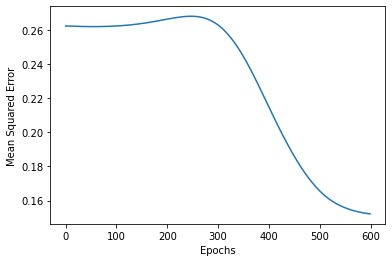

In [164]:
weight_matrices = []
ffn = FFNetwork()
ffn.fit(X_train, Y_train, epochs=600, learning_rate=5, display_loss=True, display_weight=True)

In [165]:
class FFNetworkVectorised:
  
  def __init__(self, W1, W2, W3):
    self.W1 = W1.copy()
    self.W2 = W2.copy()
    self.W3 = W3.copy()
    self.B1 = np.zeros((1,2))
    self.B2 = np.zeros((1,2))
    self.B3 = np.zeros((1,1))
  
  def sigmoid(self, X):
    return 1.0/(1.0 + np.exp(-X))
  
  def softmax(self, X):
    exps = np.exp(X)
    return exps / np.sum(exps, axis=1).reshape(-1,1)
  
  def forward_pass(self, X):
    
    self.A1 = np.matmul(X,self.W1) + self.B1
    self.H1 = self.sigmoid(self.A1) 
    self.A2 = np.matmul(self.H1, self.W2) + self.B2 
    self.H2 = self.sigmoid(self.A2)
    self.A3 = np.matmul(self.H2, self.W3) #+ self.B3 
    self.H3 = self.sigmoid(self.A3) 
    return self.H3
    
  def grad_sigmoid(self, X):
    return X*(1-X) 
  
  def grad(self, X, Y):
    self.forward_pass(X)
    m = X.shape[0]
    Y_Reshaped = Y.reshape(Y.shape[0],-1)
    self.dA3 = np.multiply((self.H3 - Y_Reshaped) , self.grad_sigmoid(self.H3))
    self.dW3 = np.matmul(self.H2.T, self.dA3) 
    self.dB3 = np.sum(self.dA3, axis=0).reshape(1, -1)
    
    self.dH2 = np.matmul(self.dA3, self.W3.T) 
    self.dA2 = np.multiply(self.dH2, self.grad_sigmoid(self.H2))
    self.dW2 = np.matmul(self.H1.T, self.dA2)
    self.dB2 = np.sum(self.dA2, axis=0).reshape(1, -1)

    self.dH1 = np.matmul(self.dA2, self.W2.T) 
    self.dA1 = np.multiply(self.dH1, self.grad_sigmoid(self.H1))
    self.dW1 = np.matmul(X.T, self.dA1)
    self.dB1 = np.sum(self.dA1, axis=0).reshape(1, -1)


      
  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False):
      
    if display_loss:
      loss = {}
    
    for i in notebook.tqdm(range(epochs), total=epochs, unit="epoch"):
      self.grad(X, Y)
        
      m = X.shape[0]
      self.W3 -= learning_rate * (self.dW3/m)
      self.B3 -= learning_rate * (self.dB3/m)
      self.W2 -= learning_rate * (self.dW2/m)
      self.B2 -= learning_rate * (self.dB2/m)
      self.W1 -= learning_rate * (self.dW1/m)
      self.B1 -= learning_rate * (self.dB1/m)


      if display_loss:
        Y_pred = self.predict(X)
        Y_Reshaped = Y.reshape(Y.shape[0],-1)
        loss[i] = log_loss(np.argmax(Y_Reshaped, axis=1), Y_pred)
    
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Log Loss')
      plt.show()
      
  
  def predict(self, X):
    Y_pred = self.forward_pass(X)
    return np.array(Y_pred).squeeze()

In [166]:
W1 = np.random.randn(2,2)
W2 = np.random.randn(2,2)
W3 = np.random.randn(2,1)
ffnv = FFNetworkVectorised(W1, W2, W3)
ffnv.fit(X_train, Y_train, epochs=500, learning_rate=5, display_loss=False)

Training accuracy 0.81
Validation accuracy 0.77


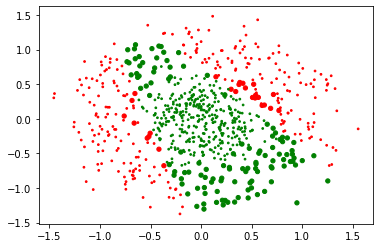

Training accuracy 0.81
Validation accuracy 0.77


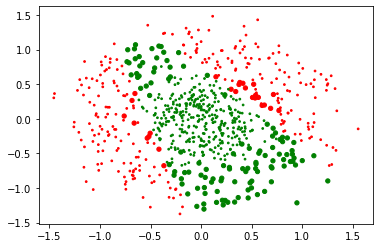

In [167]:
models = [ffn, ffnv]

for model in models:
    Y_pred_train = ffn.predict(X_train)
    Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
    Y_pred_val = ffn.predict(X_val)
    Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
    accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
    accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

    print("Training accuracy", round(accuracy_train, 2))
    print("Validation accuracy", round(accuracy_val, 2))
    plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=rgb_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
    plt.show()

In [39]:
def plot_heat_map(epoch):
    fig = plt.figure(figsize=(10, 1))
    sns.heatmap(weight_matrices[epoch], annot=True, cmap=rgb_cmap, vmin=-3, vmax=3)
    plt.title("Epoch "+str(epoch))

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


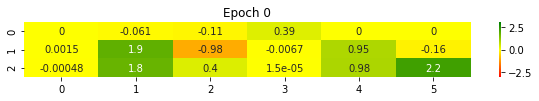

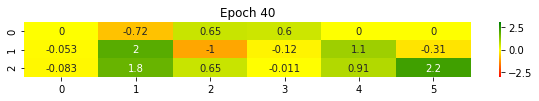

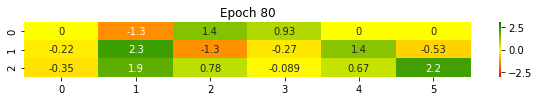

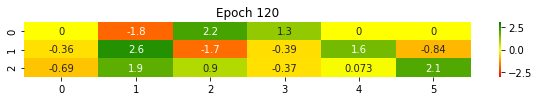

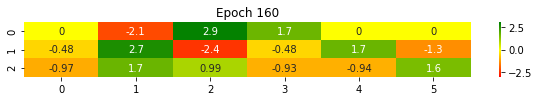

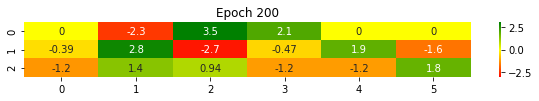

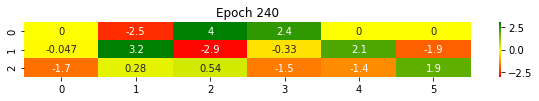

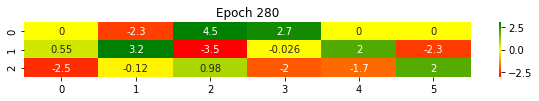

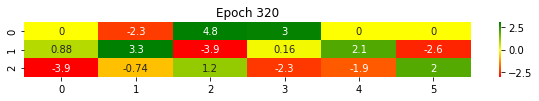

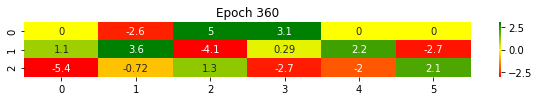

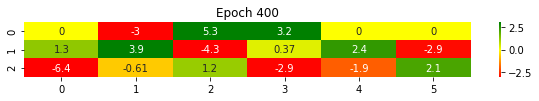

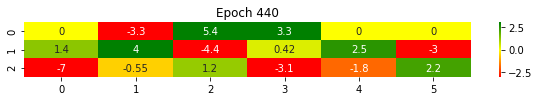

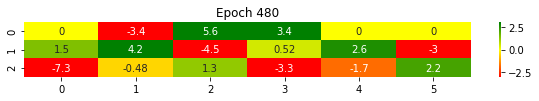

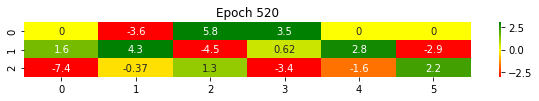

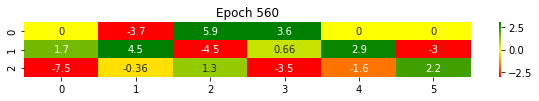

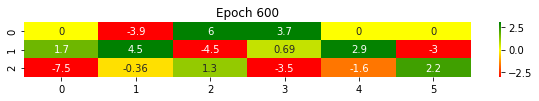

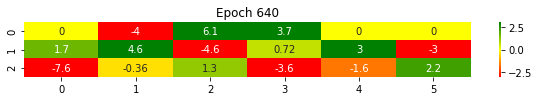

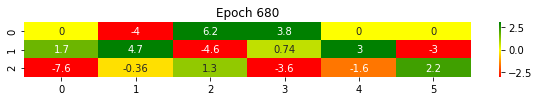

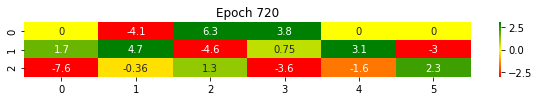

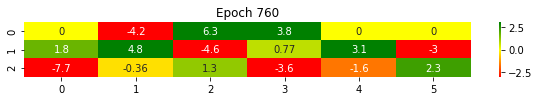

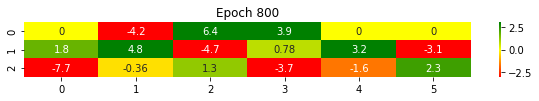

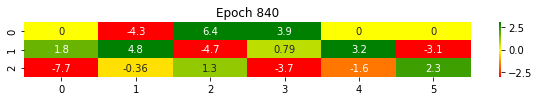

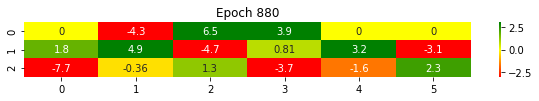

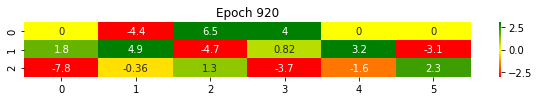

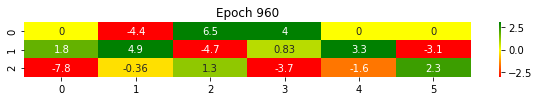

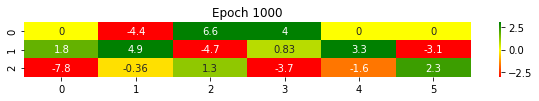

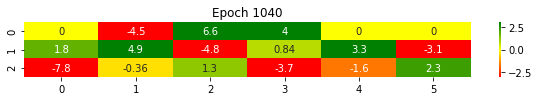

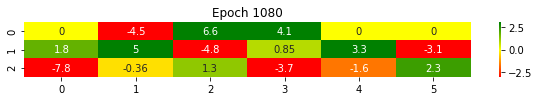

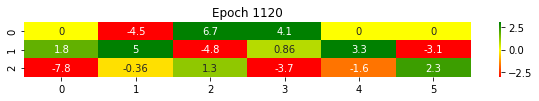

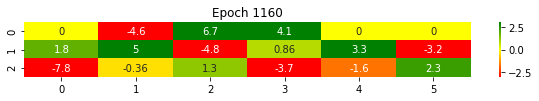

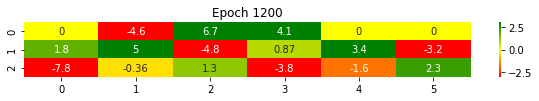

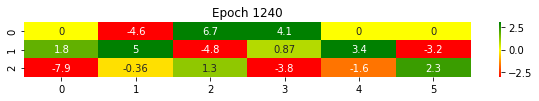

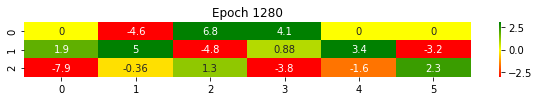

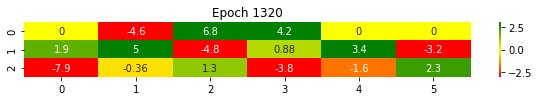

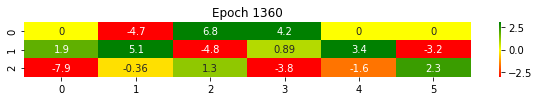

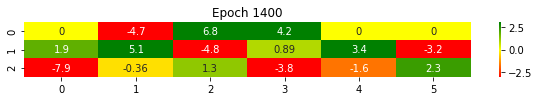

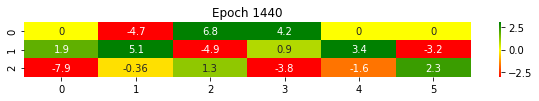

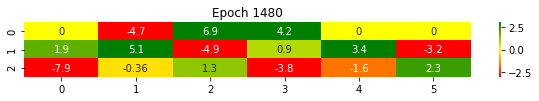

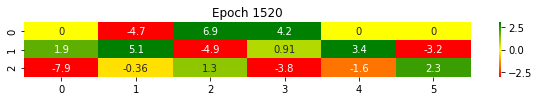

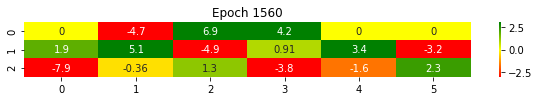

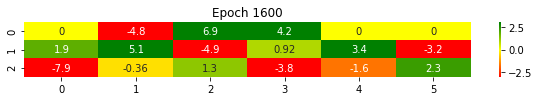

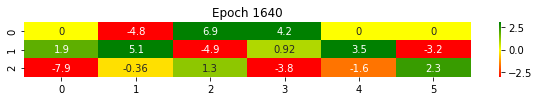

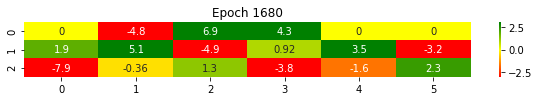

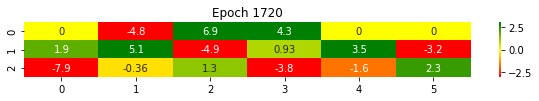

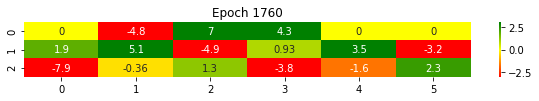

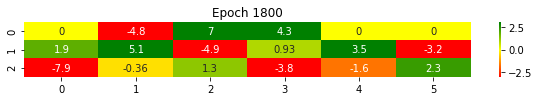

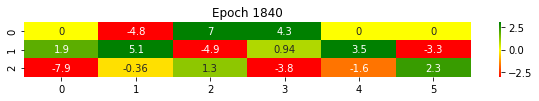

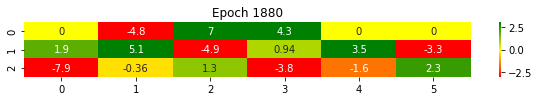

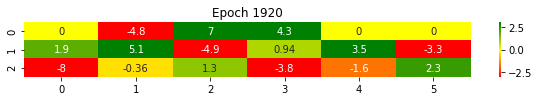

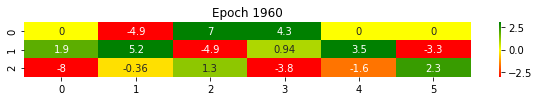

In [40]:
imageio.mimsave('./weights_viz.gif', [plot_heat_map(i) for i in range(0,len(weight_matrices),len(weight_matrices)//50)], fps=1)

True

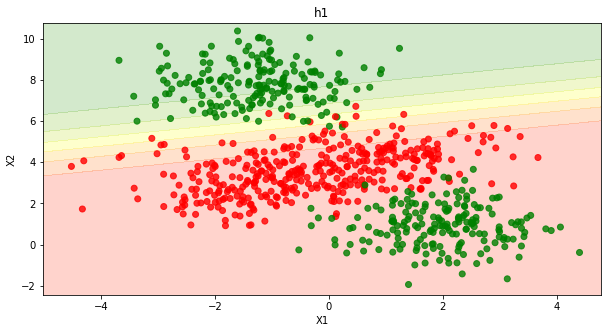

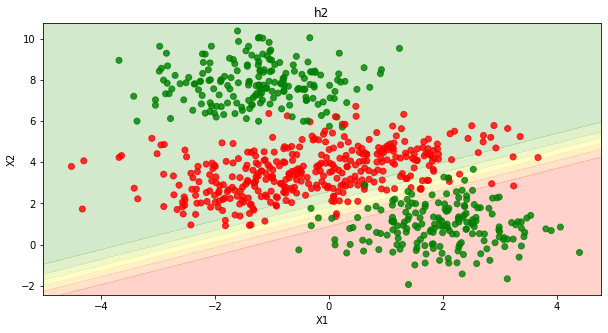

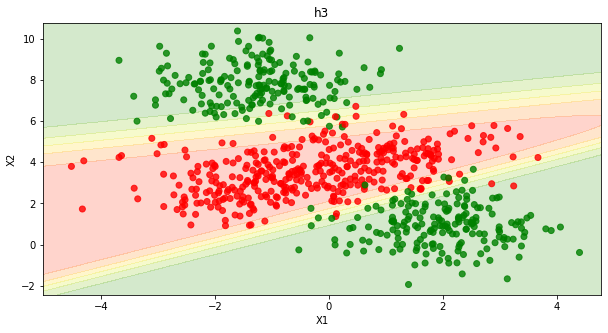

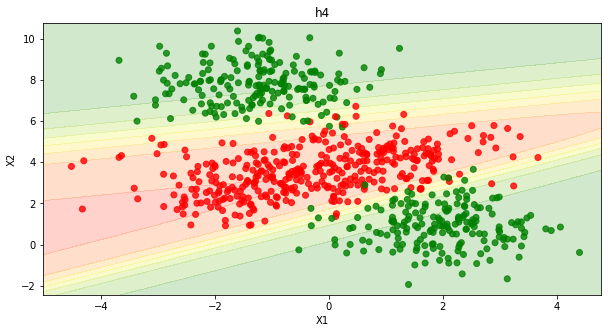

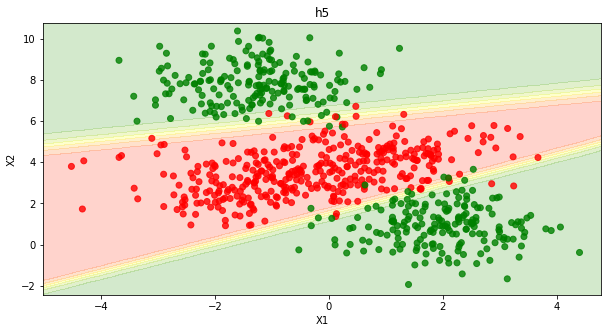

In [47]:
def make_meshgrid(x, y, h=.2):
    x_min, x_max = x.min() - 0.5, x.max() + 0.5
    y_min, y_max = y.min() - 0.5, y.max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
  
def plot_contours(ax, predict, xx, yy, **params):
    Z = predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
  
def plot_boundary():
    xx, yy = make_meshgrid(X_train[:,0], X_train[:,1])
    predict_functions = [ffn.predict_h1, ffn.predict_h2, ffn.predict_h3, ffn.predict_h4, ffn.predict_h5]
    
    for i in range(5):

      fig, ax = plt.subplots(figsize=(10,5))

      plot_contours(ax, predict_functions[i], xx, yy,
                    cmap=rgb_cmap, alpha=0.2)
      ax.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=rgb_cmap, alpha=0.8)
      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
      ax.set_xlabel('X1')
      ax.set_ylabel('X2')
      ax.set_title("h"+str(i+1))
      
    return True
  
plot_boundary()